In [188]:
import pandas as pd
import numpy as np

In [189]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
!wget $data

--2025-04-23 01:18:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: 'laptops.csv.1'

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2025-04-23 01:18:55 (16.3 MB/s) - 'laptops.csv.1' saved [298573/298573]



In [190]:
df = pd.read_csv('laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [191]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [192]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [193]:
for str in strings:
    df[str] = df[str].str.lower().str.replace(' ', '_')

In [194]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [195]:
df.ram.median()

16.0

In [196]:
n = len(df)
n_train = int(n*0.6)
n_val = int(0.2*n)
n_test = n - n_train - n_val

n_train, n_val, n_test

(1296, 432, 432)

In [197]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [198]:
df_train = df.loc[idx[: n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]

In [199]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [227]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [228]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='final_price', ylabel='Count'>

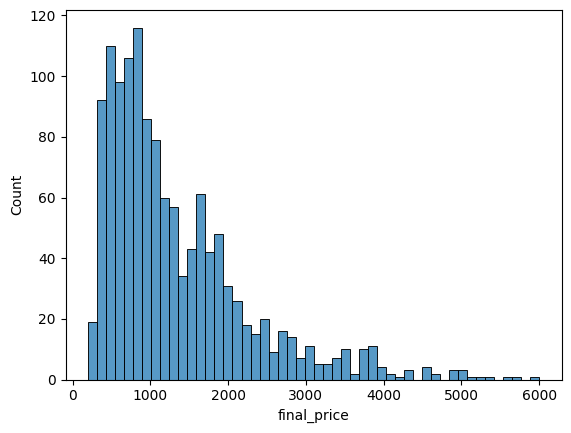

In [230]:
sns.histplot(df_train.final_price, bins = 50)

In [231]:
df_train.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [232]:
base = ['ram', 'storage', 'screen']

In [233]:
def train_regression_model(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.column_stack((ones, X))
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w[0], w[1:]

In [234]:
df_mean = df['screen'].mean()

In [235]:
def prepare_X(df):
    X = df[base].copy()
    X = X.fillna(0).values
    return X

In [236]:
def rmse(y, y_pred):
    return ((y-y_pred)**2).mean()**0.5

In [237]:
X_train = prepare_X(df_train)
w0, w = train_regression_model(X_train, df_train.final_price.values)

X_val = prepare_X(df_val)
y_pred = w0 + w.dot(X_val.T)

rmse_val = rmse(df_val.final_price.values, y_pred)
round(rmse_val, 2)

597.36

In [238]:
def prepare_X(df):
    X = df[base].copy()
    X = X.fillna(0).values
    return X

In [239]:
X_train = prepare_X(df_train)
w0, w = train_regression_model(X_train, df_train.final_price.values)

X_val = prepare_X(df_val)
y_pred = w0 + w.dot(X_val.T)

rmse_val = rmse(df_val.final_price.values, y_pred)
round(rmse_val, 2)

597.36

In [240]:
def train_regression_model_reg(X, y, r= 10):
    ones = np.ones((X.shape[0], 1))
    X = np.column_stack((ones, X))

    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])

    w = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w[0], w[1:]

In [241]:
for r in [0, 0.01, 1, 10, 100, 1000, 10000, 100000]:
    X_train = prepare_X(df_train)
    w0, w = train_regression_model_reg(X_train, df_train.final_price.values, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + w.dot(X_val.T)

    rmse_val = rmse(df_val.final_price.values, y_pred)
    print('%06s %0.2f' % (r, rmse_val))

     0 597.36
  0.01 597.36
     1 597.21
    10 597.06
   100 597.90
  1000 598.13
 10000 598.14
100000 610.84


In [242]:
X_train = prepare_X(df_train)
w0, w = train_regression_model_reg(X_train, df_train.final_price.values)

X_val = prepare_X(df_val)
y_pred = w0 + w.dot(X_val.T)

rmse_val = rmse(df_val.final_price.values, y_pred)
round(rmse_val, 2)

597.06

In [243]:
def prepare_X(df):
    X = df[base].copy()
    X = X.fillna(0).values
    return X

In [244]:
def train_regression_model(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.column_stack((ones, X))
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w[0], w[1:]

In [245]:
rmse_vals = []

In [259]:
def seed_calc(seed) : 
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.loc[idx[: n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val: ]]

    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)

    df_full_train = pd.concat([df_train, df_val])
    df_full_train.reset_index(drop=True, inplace=True)

    X_full_train = prepare_X(df_full_train)
    w0, w = train_regression_model_reg(X_full_train, df_full_train.final_price.values, r = 0.001)

    X_test = prepare_X(df_test)
    y_pred = w0 + w.dot(X_test.T)

    rmse_val = rmse(df_test.final_price.values, y_pred)
    return rmse_val

In [260]:
# seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [261]:
# for s in seeds:
#     rmse_vals.append(seed_calc(s))

# # np.array(rmse_vals).std()
# round(np.array(rmse_vals).std(), 3)

In [262]:
rmse = seed_calc(9)

In [264]:
round(rmse, 3)

608.61